In [ ]:
!pip install spectral

     |████████████████████████████████| 184 kB 27.2 MB/s 
  Created wheel for spectral: filename=spectral-0.22.2-py3-none-any.whl size=212954 sha256=f9aacc9a1499ef74b1b1735b8c4a8712972696e13c43a9ea5bd534ee4b51d615
  Stored in directory: /root/.cache/pip/wheels/8b/3c/53/b5300d56bee75c16de9b19cd481c419cc63929f2e4019a6235
Successfully built spectral


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)

In [ ]:
# Bibliotecas
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
from spectral import imshow
from matplotlib import colors

In [ ]:
# Leitura da imagem
img = tiff.imread('/content/drive/MyDrive/Live PDI Python/multi_r_xs_psm.tif')

In [ ]:
img.shape

(4344, 4941, 4)

ImageView object:
  Display bands       :  (1, 2, 3)
  Interpolation       :  <default>
  RGB data limits     :
    R: [51.83320236206055, 218.97805786132812]
    G: [66.13609313964844, 166.56378173828125]
    B: [49.52226257324219, 177.87142944335938]

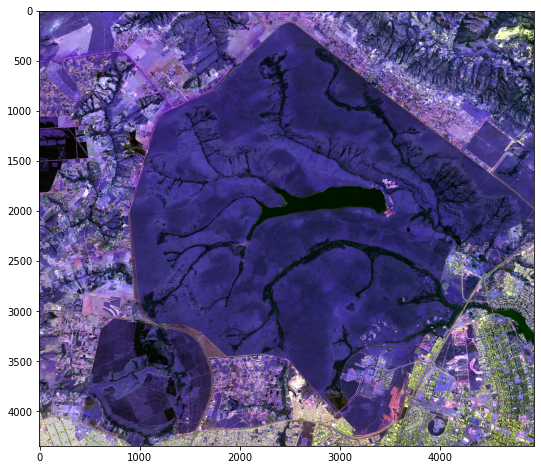

In [ ]:
# Visualizando imagem
imshow(img, (1,2,3), stretch=(0.02, 0.98))

In [ ]:
R = img[:,:,1]
G = img[:,:,2]

In [ ]:
# Pseudo-cor
R = ( 0.1 * img[:,:,0] ) + ( 0.9 * img[:,:,1] ) + ( 0.0 * img[:,:,2])
G = ( 0.3 * img[:,:,0] ) + ( 0.0 * img[:,:,1] ) + ( 0.7 * img[:,:,2])
B = ( 0.1 * img[:,:,0] ) + ( 0.1 * img[:,:,1] ) + ( 0.8 * img[:,:,2])

# Empilhando imagens
multi = np.dstack([B,G,R,img[:,:,0]])

In [ ]:
multi.shape

(4344, 4941, 4)

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [55.94999694824219, 213.54092407226562]
    G: [65.02407836914062, 166.7814483642578]
    B: [65.90956115722656, 171.08541870117188]

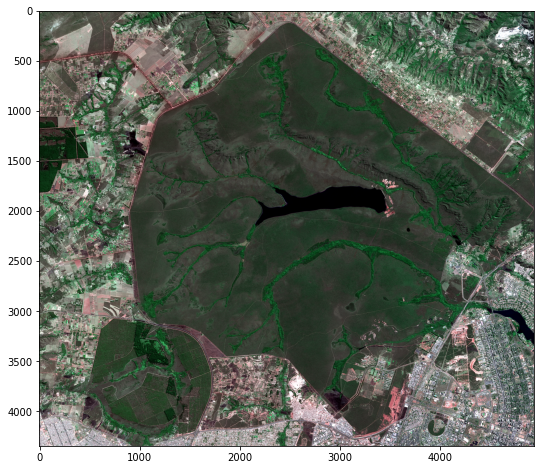

In [ ]:
# Visualizando pseudo-cor
imshow(multi, (2,1,0),stretch=(0.02,0.98))

In [ ]:
# Cálculo do NDVI
ndvi = ( multi[:,:,3] - multi[:,:,2] )  /  ( multi[:,:,3] + multi[:,:,2] )

# Cálculo do PRI
pri = ( multi[:,:,0] - multi[:,:,1] )  /  ( multi[:,:,0] + multi[:,:,1] )

In [ ]:
# Cálculo do sPri
spri = (pri + 1) / 2

# Cálculo do CO2flux
CO2flux = (ndvi * spri)

In [ ]:
CO2flux.flatten().shape

TypeError: ignored

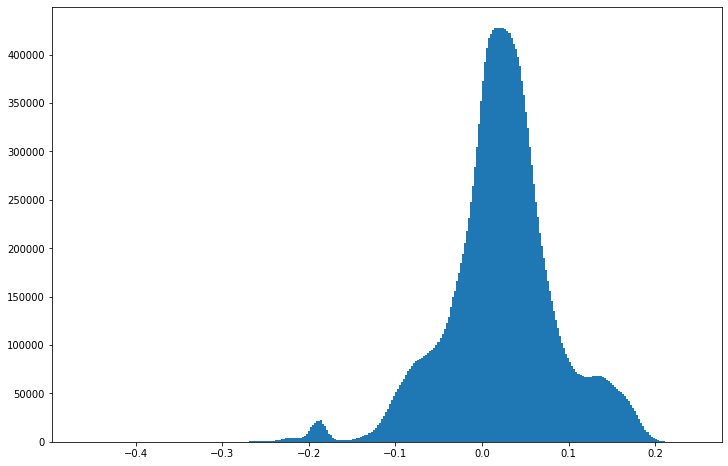

In [ ]:
# Visualizando histograma CO2flux
plt.hist(CO2flux.flatten(), bins=300)
plt.show()

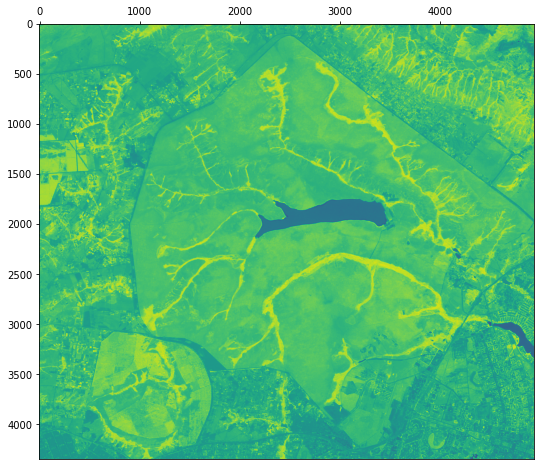

In [ ]:
# Visualizando CO2flux com intervalos contínuos 
fig, ax = plt.subplots()
ax.imshow(CO2flux)
ax.xaxis.tick_top()
plt.show()

In [ ]:
#0 quartil = 0 quantil; 
#1 quartil = 0,25 quantil; 
#2 quartil = 0,5 quantil; 
#3 quartil = 0,75 quantil; 
#4 quartil = 1 quantil.

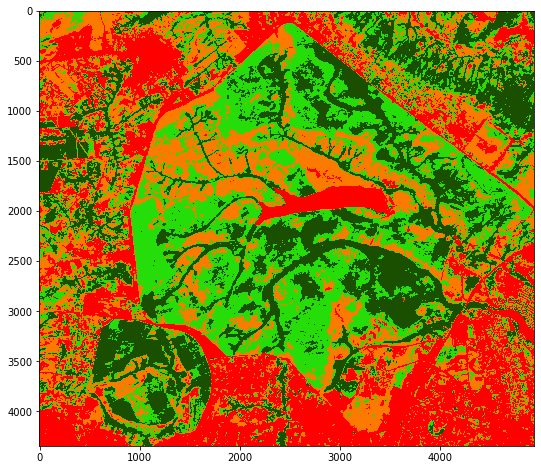

In [ ]:
# Visualizando CO2flux com intervalos discretos
q1 = np.quantile(CO2flux, 0)
q2 = np.quantile(CO2flux, 0.25)
q3 = np.quantile(CO2flux, 0.5)
q4 = np.quantile(CO2flux, 0.75)
q5 = np.quantile(CO2flux, 1)

cmap = colors.ListedColormap(['red', '#fd7a00','#25dd08','#1a4f00'])

bounds=[q1,q2,q3,q4,q5]

norm = colors.BoundaryNorm(bounds, cmap.N)

im = plt.imshow(CO2flux,cmap=cmap, norm=norm)

In [ ]:
C = CO2flux[:]
id(CO2flux), id(C)

(140514647190624, 140514647220992)

In [ ]:
CO = CO2flux.copy()


CO[CO2flux == q1] = 1
CO[(CO2flux > q1) & (CO2flux <= q2)] = 2
CO[(CO2flux > q2) & (CO2flux <= q3)] = 3
CO[(CO2flux > q3) & (CO2flux <= q4)] = 4
CO[(CO2flux > q4)] = 5

In [ ]:
CO

array([[3., 3., 3., ..., 5., 5., 5.],
       [3., 3., 3., ..., 5., 5., 5.],
       [3., 3., 3., ..., 5., 5., 5.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.]], dtype=float32)

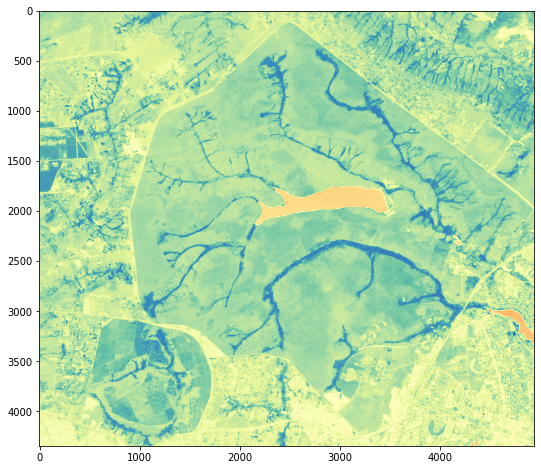

In [ ]:
plt.imshow(CO2flux,cmap='Spectral')

In [ ]:
CO2 = np.digitize(CO2flux,bounds)


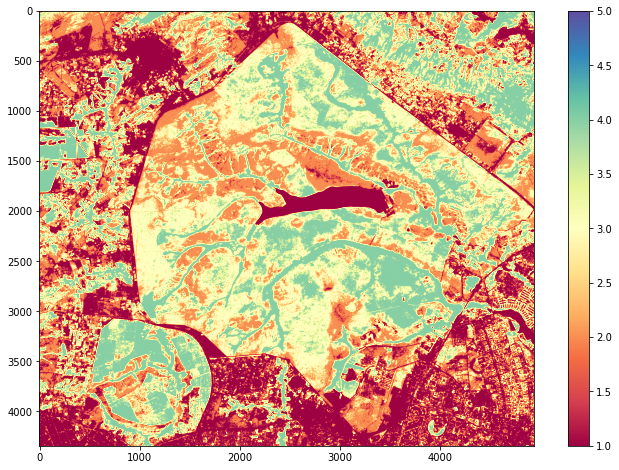

In [ ]:
v = plt.imshow(CO2,cmap='Spectral')
plt.colorbar(v)